# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

# Get Data

In [2]:
df=pd.read_csv('boston_housing.csv')
df.shape

(489, 4)

In [3]:
df.head()
#average number of rooms per dwelling
#lower status of the population
#pupil-teacher ratio by town
#Median value of owner-occupied homes in $1000's

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


# EDA

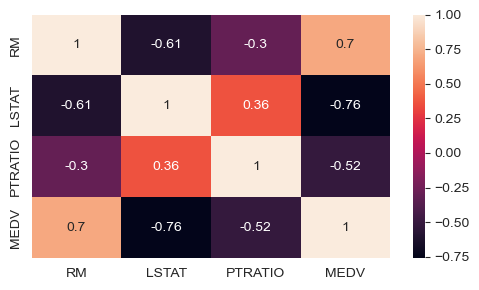

In [6]:
cm=df.corr()
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)
plt.tight_layout()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12664\1159533026.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y,bins=50,color='gray')


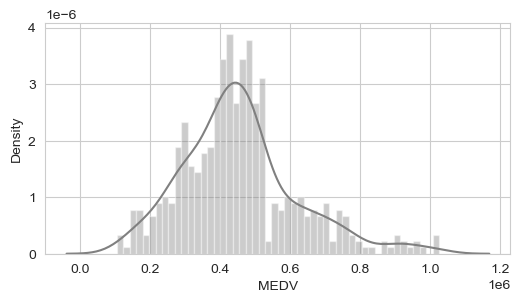

In [24]:
plt.figure(figsize=(6,3))
sns.distplot(Y,bins=50,color='gray')
plt.show()

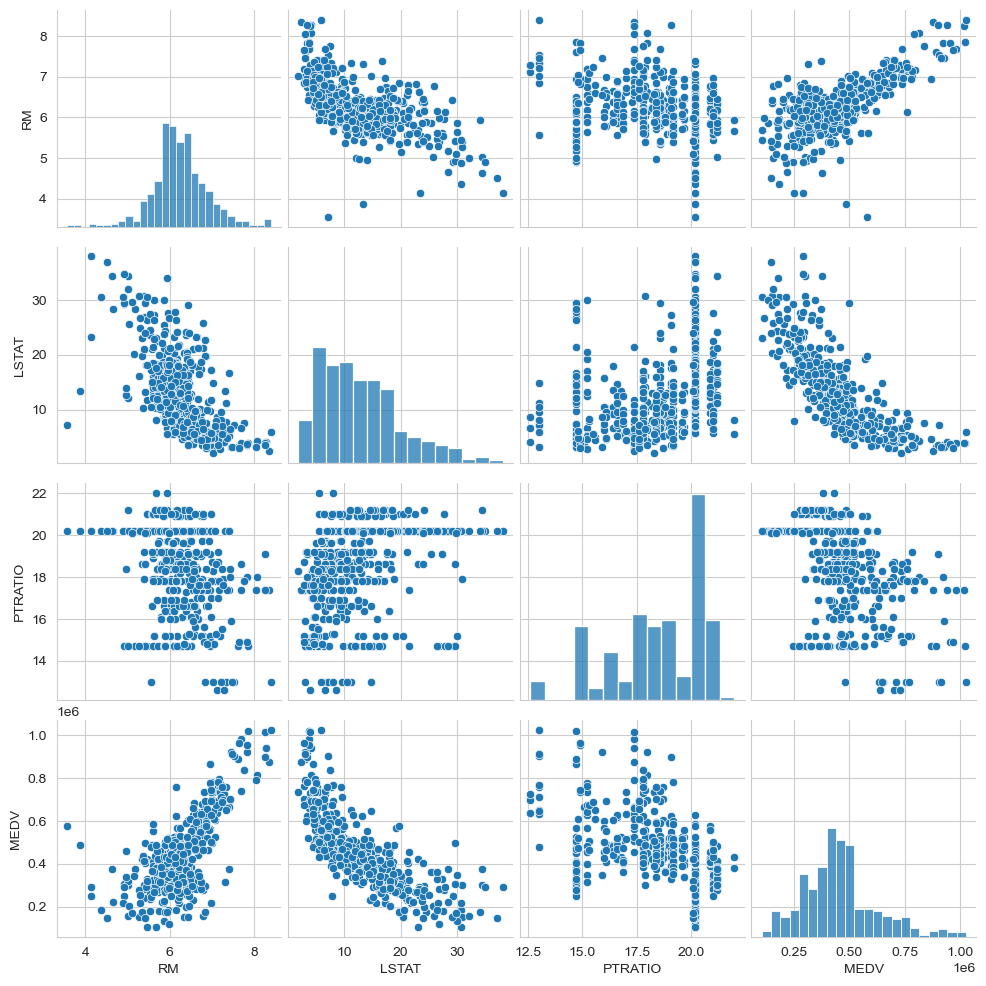

In [9]:
sns.pairplot(df)

In [7]:
X=df.drop(['MEDV'],axis=1)
Y=df['MEDV']

# Tran Test Split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=.15,random_state=101)

# Train Model

In [11]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
print(lr.intercept_)

415635.4063567504


In [13]:
lr.coef_

array([ 83746.05285138, -11026.20851495, -18580.49871423])

In [14]:
coefs=pd.DataFrame(data=lr.coef_, index=X.columns, columns=["coef"])
coefs

,coef
RM,83746.052851
LSTAT,-11026.208515
PTRATIO,-18580.498714


##### Holding all other features fixed, a 1 unit increase in average number of rooms is associated with an *increase of $83746.05 *.


##### Holding all other features fixed, a 1 unit increase in population status is associated with an *decrease of $-11026.20 *.

##### Holding all other features fixed, a 1 unit increase in pupil_teacher ratio is associated with an *decrease of $-18580.49 *.

# prediction

In [15]:
predictions=lr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

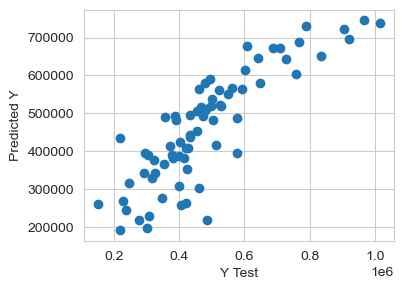

In [16]:
plt.figure(figsize=(4,3))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluation

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE= mean_absolute_error(y_test, predictions)
MSE= mean_squared_error(y_test, predictions)
RMSE=np.sqrt(MSE) 

In [18]:
print(f"The mean absolute error is: {round(MAE,2)}\nThe mean squared error is: {round(MSE,2)}\nThe root mean squared error is: {round(RMSE,2)}")

The mean absolute error is: 71424.14
The mean squared error is: 9492233550.37
The root mean squared error is: 97428.09


C:\Users\ACER\AppData\Local\Temp\ipykernel_12664\708743988.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins=50, color='green')


Text(0.5, 0, 'realY - predictedY')

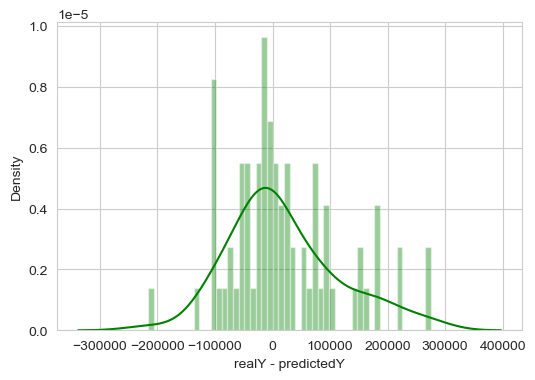

In [19]:
plt.figure(figsize=(6,4))
sns.distplot((y_test-predictions), bins=50, color='green')
plt.xlabel('realY - predictedY')

### *The distribution plot shows that diffrence between real label and prediction following a  **Normal distribution**  and this is a good result.*

# Extra Working

### I want to see that does Scaling on data affect on performance and pridiction evaluation in regression tasks?

#### I Want First Scaling just on x_train and x_test and comparing with scaling on all data (include class attrubute or y)

In [55]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

scaled_x_train=ss.fit_transform(x_train)

scaled_x_test= ss.transform(x_test)

In [56]:
lr_on_train=LinearRegression()
lr_on_train.fit(scaled_x_train,y_train)

LinearRegression()

In [58]:
prediction=lr_on_train.predict(scaled_x_test)

Text(0, 0.5, 'Predicted Y')

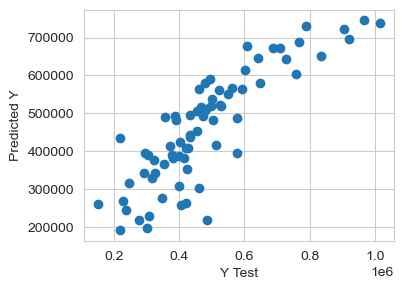

In [59]:
plt.figure(figsize=(4,3))
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE= mean_absolute_error(y_test, prediction)
MSE= mean_squared_error(y_test, prediction)
RMSE=np.sqrt(MSE) 

In [61]:
print(f"The mean absolute error is: {round(MAE,2)}\nThe mean squared error is: {round(MSE,2)}\nThe root mean squared error is: {round(RMSE,2)}")

The mean absolute error is: 71424.14
The mean squared error is: 9492233550.37
The root mean squared error is: 97428.09


### same resuts we obtianed from the no scalling model.

# Scaling on All data

In [71]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df_new=pd.DataFrame(ss.fit_transform(df),columns=['RM','LSTAT','PTRATIO','MEDV'])

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(df_new.drop(['MEDV'],axis=1) ,df_new['MEDV'] ,test_size=.15 ,random_state=101)

In [73]:
lr_all=LinearRegression()
lr_all.fit(x_train,y_train)

LinearRegression()

In [74]:
prediction=lr_all.predict(x_test)

Text(0, 0.5, 'Predicted Y')

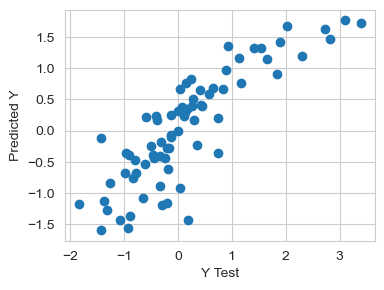

In [78]:
plt.figure(figsize=(4,3))
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE= mean_absolute_error(y_test, prediction)
MSE= mean_squared_error(y_test, prediction)
RMSE=np.sqrt(MSE) 

In [77]:
print(f"The mean absolute error is: {round(MAE,2)}\nThe mean squared error is: {round(MSE,2)}\nThe root mean squared error is: {round(RMSE,2)}")

The mean absolute error is: 0.43
The mean squared error is: 0.35
The root mean squared error is: 0.59


# Conclution:

#### It can be concluded from this results that the results when we don't use scaling with just scaling on x_train and x_test is equl and scaling is useless.

#### but the results when scaling implement on all data even class attribute we get some diffrent values for our metrics that use for evaluation. but i think this values can be valid and usefull for comparing and interpretation because the scatter plot which draw between true value and predicted value same as other models(no scaling and scaling on x).

#### all in all, i think we have another view of our prediction and can be use as a tool for more exploration and making accurate decision.
